In [2]:
# Standard imports
import numpy as np
import pandas as pd
import os

In [3]:
DATA_PATH = "../data/"

# Load data
ratings = pd.read_csv(os.path.join(DATA_PATH, "ratings.csv"))
movies = pd.read_csv(os.path.join(DATA_PATH, "movies.csv"))

# Merge datasets on 'movieId'
df = pd.merge(ratings, movies, on='movieId')

# Preview
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)
df.head()

Ratings shape: (105339, 4)
Movies shape: (10329, 3)


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


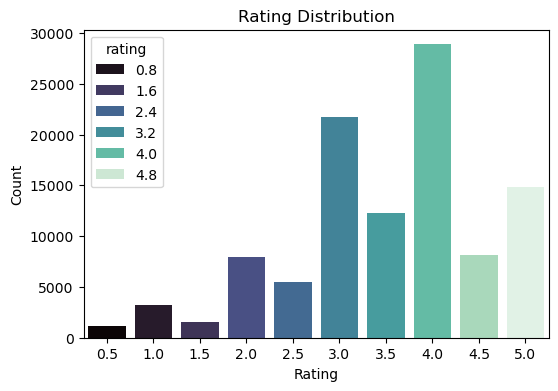

In [9]:
#1. Ratings Distribution
# For displaying plots nicely
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(6,4))
sns.countplot(data=ratings, x="rating", hue="rating", palette="mako")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

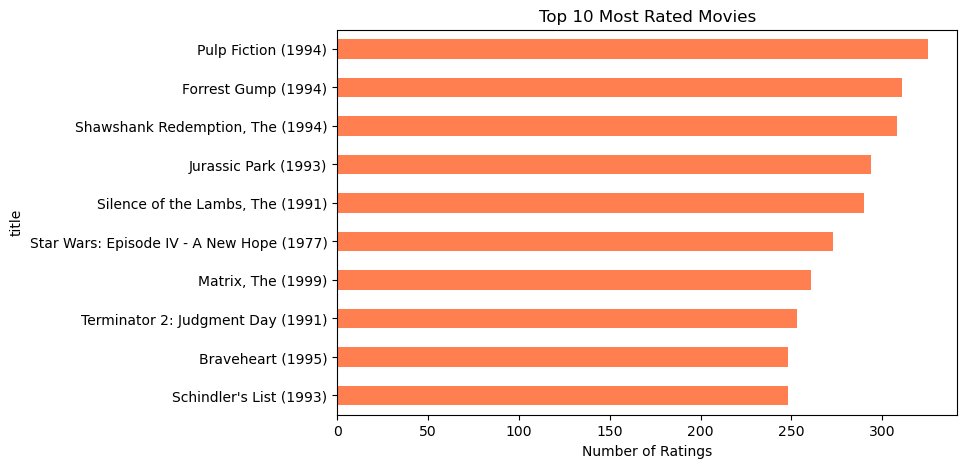

In [10]:
#2. Most Rated Movies
top_movies = df.groupby("title")["rating"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_movies.plot(kind='barh', color='coral')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()
plt.show()

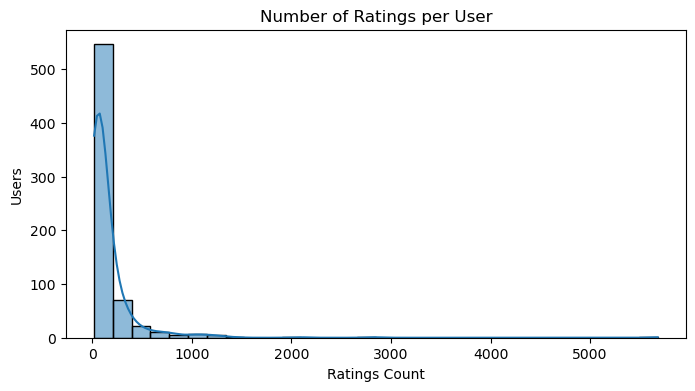

In [ ]:
#3. Ratings per User
ratings_per_user = ratings.groupby("userId")["rating"].count()
plt.figure(figsize=(8,4))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Users")
plt.show()

In [12]:
#4. Sparsity Check
n_users = df['userId'].nunique()
n_movies = df['movieId'].nunique()
n_ratings = df.shape[0]

sparsity = 1 - (n_ratings / float(n_users * n_movies))
print(f"Sparsity of the ratings matrix: {sparsity:.4f}")

Sparsity of the ratings matrix: 0.9847
